# Plot data

In [26]:
# Load data:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
data_train=pd.read_excel("DST_BIL54_train.xlsx",header=None)
list_of_drive = data_train.iloc[1].values


In [27]:
# Create new column with time variable:
list_of_drive = list_of_drive[1:]

time = np.array([2018+1/12 * i for i in range(0, len(list_of_drive))])

Text(0, 0.5, 'Drivmidler i alt')

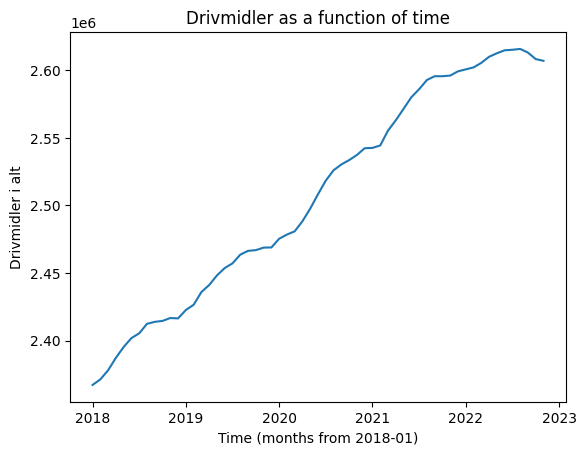

In [28]:

plt.plot(time,list_of_drive)
plt.title('Drivmidler as a function of time')
plt.xlabel('Time (months from 2018-01)')
plt.ylabel('Drivmidler i alt')

Notes
- Seems to be globally increasing somewhat linearly, stagnates towards the end and seems to be a slight seasonality. 

# OLS

In [29]:
# calculate the parameters of an OLS regression:

# stack  with a columnn of ones:
data = np.array(list_of_drive)
time_inter = np.vstack((np.ones(len(time)), time.T)).T

# Calculate the parameters:
beta = np.linalg.inv(time_inter.T @ time_inter) @ time_inter.T @ data

In [30]:
beta

array([-109499932.75338264, 55437.78301683211], dtype=object)

In [34]:
# estimate the errors of the parameters:

# calculate the residuals:
residuals = data - time_inter @ beta

# calculate the variance of the residuals:
variance = residuals.T @ residuals / (len(time) - 2)

# calculate the variance of the parameters:
var_beta = variance * np.linalg.inv(time_inter.T @ time_inter)

# calculate the standard deviation of the parameters:
std_beta = np.sqrt(np.diag(var_beta))

std_beta

array([1.92155555e+06, 9.51068713e+02])

In [40]:
# forcastt of the drivmidler 
x_forcast = np.array([np.max(time)+1/12*i for i in range (1, 13)])
x_forcast = np.vstack((np.ones(len(x_forcast)), x_forcast.T)).T
y_forcast = x_forcast @ beta

# calculate the confidence interval:
t = stats.t.ppf(0.90, len(time) - 2)

# calculate the vmatrix based on variance and the x_forcast matrix:
vmatrix = variance * (1+x_forcast @ np.linalg.inv(time_inter.T @ time_inter) @ x_forcast.T)
y_forcast_upper = y_forcast + t * np.sqrt(np.diag(vmatrix))
y_forcast_lower = y_forcast - t * np.sqrt(np.diag(vmatrix))


In [41]:
x_forcast

array([[1.00000000e+00, 2.02291667e+03],
       [1.00000000e+00, 2.02300000e+03],
       [1.00000000e+00, 2.02308333e+03],
       [1.00000000e+00, 2.02316667e+03],
       [1.00000000e+00, 2.02325000e+03],
       [1.00000000e+00, 2.02333333e+03],
       [1.00000000e+00, 2.02341667e+03],
       [1.00000000e+00, 2.02350000e+03],
       [1.00000000e+00, 2.02358333e+03],
       [1.00000000e+00, 2.02366667e+03],
       [1.00000000e+00, 2.02375000e+03],
       [1.00000000e+00, 2.02383333e+03]])

In [42]:
y_forcast

array([2646082.474417314, 2650702.289668724, 2655322.104920119,
       2659941.920171514, 2664561.735422924, 2669181.5506743193,
       2673801.3659257293, 2678421.1811771393, 2683040.9964285344,
       2687660.8116799295, 2692280.6269313395, 2696900.4421827346],
      dtype=object)

In [43]:
y_forcast_lower

array([2632181.1601474653, 2636777.8258170416, 2641373.7728146384,
       2645969.004823134, 2650563.52560947, 2655157.3390219584,
       2659750.448987707, 2664342.8595098224, 2668934.574664744,
       2673525.5985995517, 2678115.935529206, 2682705.5897337683],
      dtype=object)

In [44]:
y_forcast_lower

array([2632181.1601474653, 2636777.8258170416, 2641373.7728146384,
       2645969.004823134, 2650563.52560947, 2655157.3390219584,
       2659750.448987707, 2664342.8595098224, 2668934.574664744,
       2673525.5985995517, 2678115.935529206, 2682705.5897337683],
      dtype=object)

In [45]:
# load the test data:

data_test=pd.read_excel("DST_BIL54_test.xlsx",header=None)
data_test = data_test.iloc[1].values
data_test = data_test[1:]

In [48]:
x_values = np.asarray(x_forcast[:, 1], dtype=float)
y_forecast = np.asarray(y_forcast, dtype=float)
y_forecast_lower = np.asarray(y_forcast_lower, dtype=float)
y_forecast_upper = np.asarray(y_forcast_upper, dtype=float)

TypeError: fill_between() missing 1 required positional argument: 'y1'

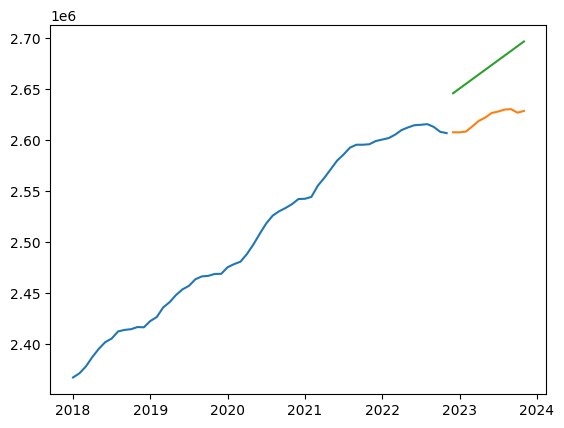

In [51]:
# plot the forecast data with the old data:
plt.plot(time,list_of_drive)
plt.plot(x_values,data_test)
plt.plot(x_values,y_forcast)
plt.fill_between([1,2],1+ color='gray', alpha=0.5)
plt.legend(["Train data",'Test data','Forecast','Confidence interval'])
plt.xlabel('Time (Years from 2018-01)')
plt.ylabel('Drivmidler i alt')
plt.title('Drivmidler as a function of time')


[2631865.4517045375 2636449.638986701 2641033.0668127607 2645615.739208691
 2650197.6602931656 2654778.8342745164 2659359.2654476683
 2663938.9581910563 2668517.916963521 2673096.1463011946 2677673.650814379
 2682250.4351844233]
